In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles

In [2]:
outDir='rolling16'
resultsDb = db.ResultsDb(outDir=outDir)

name2file = {
'rolling_2_0.8': 'sims_featureScheduler_runs1.6/rolling_fpo/rolling_fpo_2nslice0.8_v1.6_10yrs.db',
'rolling_2_0.9': 'sims_featureScheduler_runs1.6/rolling_fpo/rolling_fpo_2nslice0.9_v1.6_10yrs.db',
'rolling_2_1.0': 'sims_featureScheduler_runs1.6/rolling_fpo/rolling_fpo_2nslice1.0_v1.6_10yrs.db',
'rolling_3_0.8': 'sims_featureScheduler_runs1.6/rolling_fpo/rolling_fpo_3nslice0.8_v1.6_10yrs.db',
'rolling_3_0.9': 'sims_featureScheduler_runs1.6/rolling_fpo/rolling_fpo_3nslice0.9_v1.6_10yrs.db',
'rolling_3_1.0': 'sims_featureScheduler_runs1.6/rolling_fpo/rolling_fpo_3nslice1.0_v1.6_10yrs.db',
'rolling_6_0.8': 'sims_featureScheduler_runs1.6/rolling_fpo/rolling_fpo_6nslice0.8_v1.6_10yrs.db',
'rolling_6_0.9': 'sims_featureScheduler_runs1.6/rolling_fpo/rolling_fpo_6nslice0.9_v1.6_10yrs.db',
'rolling_6_1.0': 'sims_featureScheduler_runs1.6/rolling_fpo/rolling_fpo_6nslice1.0_v1.6_10yrs.db'}


Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint night > 1278.375000 and night < 1643.625000 and note not like "DD%" for columns ['filter', 'fieldDec', 'fieldRA']
Found 224201 visits
Running:  ['rolling_2_0_8_Count_filter_night_gt_1278_375000_and_night_lt_1643_625000_and_note_not_like_DD_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night > 1278.375000 and night < 1643.625000 and note not like "DD%"" constraint now.
monopole: 76.3535  dipole: lon: -152.638, lat: -52.5573, amp: 12.0676
Plotting complete.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint night > 1278.375000 and night < 1643.625000 and note not like "DD%" for columns ['filter', 'fieldDec', 'fieldRA']
Found 224259 visits
Running:  ['rolling_2_0_9_Count_filter_night_gt_1278_375000_and_night_lt_1643_

/Users/yoachim/lsst/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


monopole: 69.0185  dipole: lon: 32.0551, lat: -82.4945, amp: 31.8516
Plotting complete.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint night > 1278.375000 and night < 1643.625000 and note not like "DD%" for columns ['filter', 'fieldDec', 'fieldRA']
Found 223759 visits
Running:  ['rolling_6_0_9_Count_filter_night_gt_1278_375000_and_night_lt_1643_625000_and_note_not_like_DD_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night > 1278.375000 and night < 1643.625000 and note not like "DD%"" constraint now.


/Users/yoachim/lsst/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


monopole: 68.3872  dipole: lon: 45.1956, lat: -82.4152, amp: 33.3139
Plotting complete.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint night > 1278.375000 and night < 1643.625000 and note not like "DD%" for columns ['filter', 'fieldDec', 'fieldRA']
Found 223625 visits
Running:  ['rolling_6_1_0_Count_filter_night_gt_1278_375000_and_night_lt_1643_625000_and_note_not_like_DD_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night > 1278.375000 and night < 1643.625000 and note not like "DD%"" constraint now.


/Users/yoachim/lsst/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


monopole: 68.3884  dipole: lon: 76.9937, lat: -83.482, amp: 33.7314
Plotting complete.


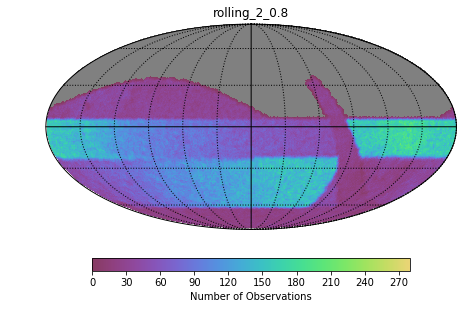

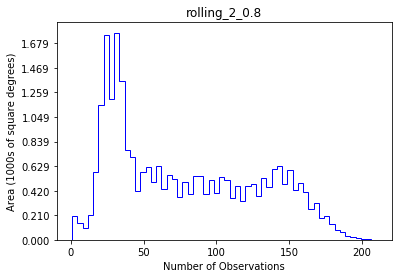

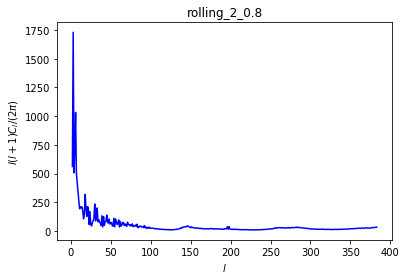

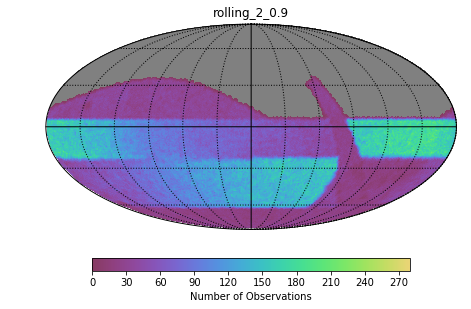

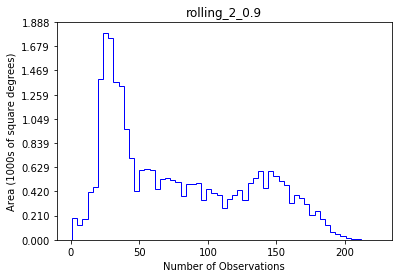

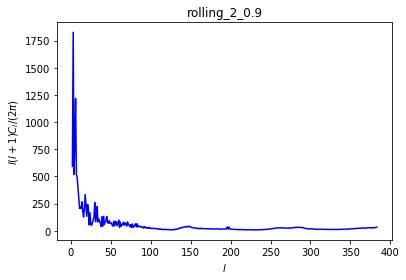

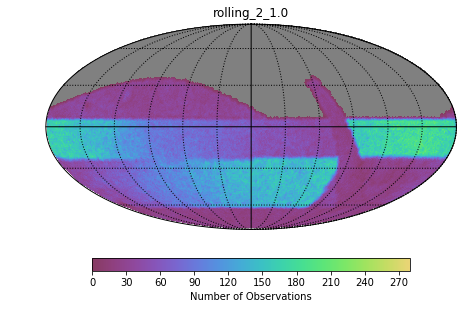

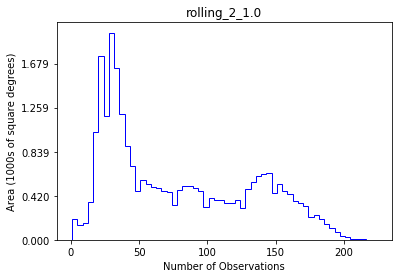

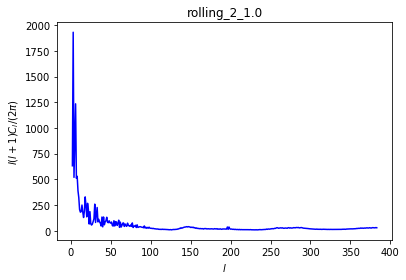

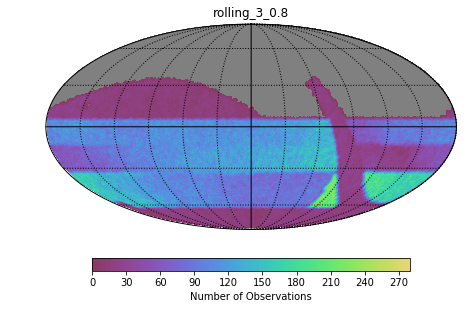

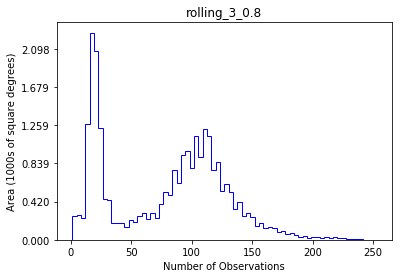

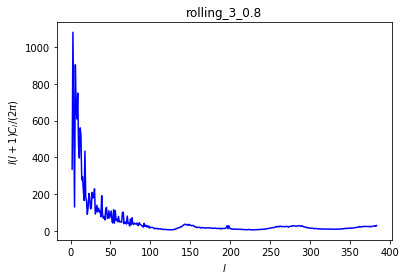

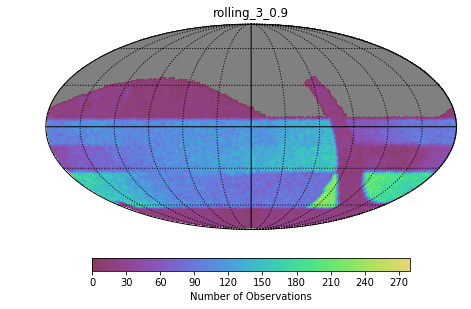

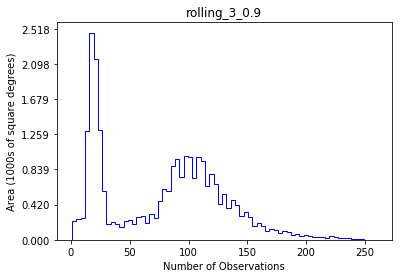

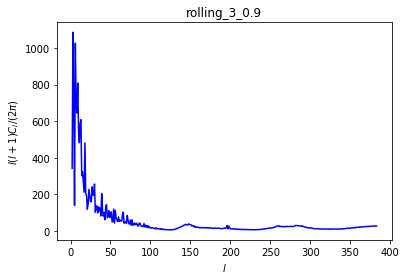

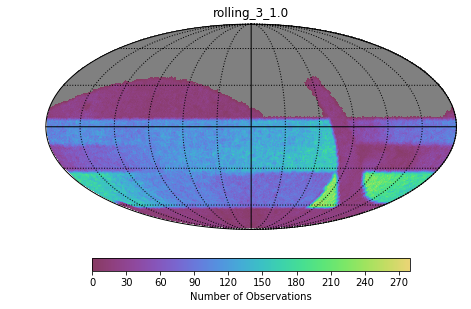

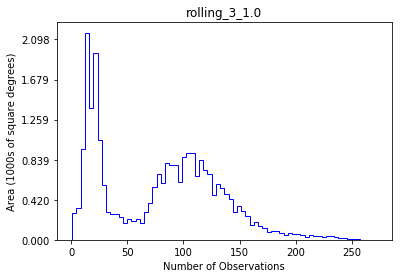

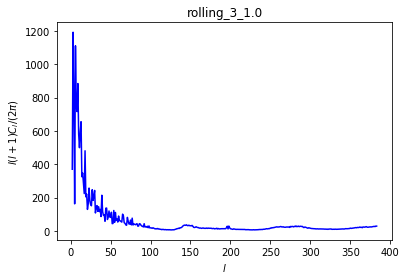

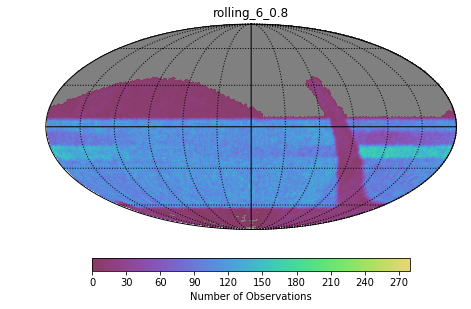

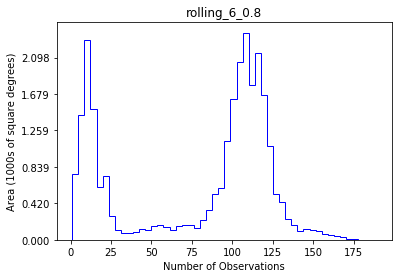

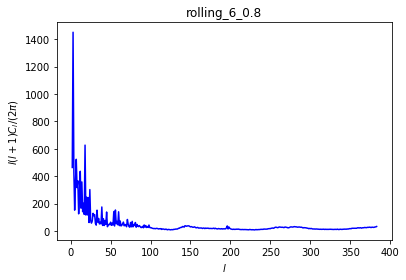

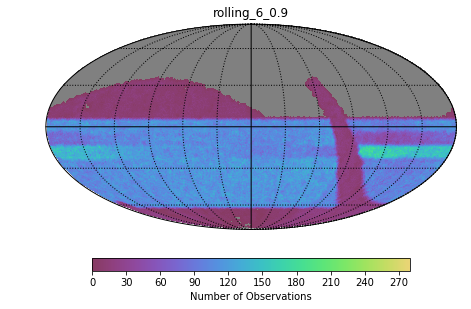

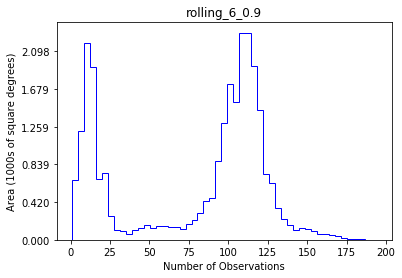

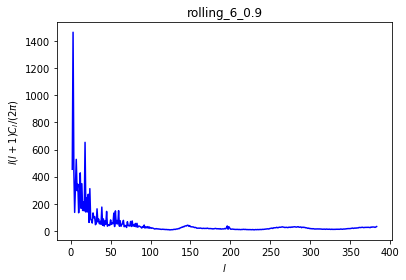

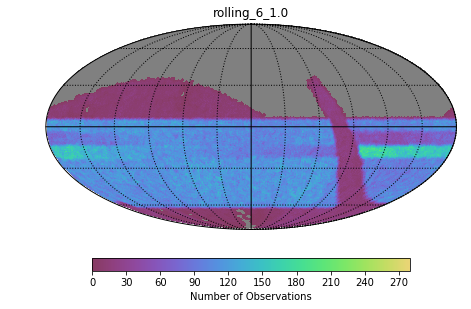

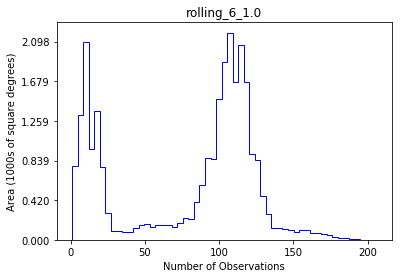

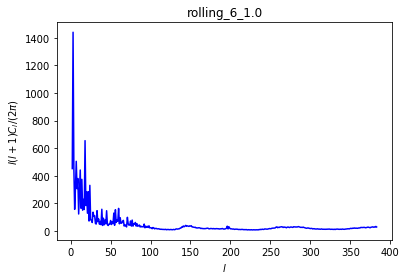

In [3]:
for name in name2file:
    conn = db.OpsimDatabase(name2file[name])
    
    bundleList = []
    sql = 'night > %f and night < %f and note not like "DD%%"' % ((365.25*3.5), (365.25*4.5) )
    metric = metrics.CountMetric('filter')
    slicer = slicers.HealpixSlicer()
    summaryStats = []
    plotDict = {'xlabel': 'Number of Observations', 'title':name, 'colorMin':0, 'colorMax': 280}
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql,
                                                 plotDict=plotDict,
                                                 summaryMetrics=summaryStats,
                                                 runName=name))
    bd = metricBundles.makeBundlesDictFromList(bundleList)
    bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
    bg.runAll()
    bg.plotAll(closefigs=False)
    conn.close()